## Function

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
selected=(0.7,0.1,0.1)
not_selected=(0,0,0)

In [ ]:
lookbacks=[1.5,3,6,12,16,24]
flow=FLOW.sum(1).sum(1).reshape((-1,CONST.NUM_SLOTs_day)).T
corr=np.full((CONST.NUM_SLOTs_day,2*CONST.NUM_SLOTs_day),np.nan)
for i in range(CONST.NUM_SLOTs_day):
    for j in range(CONST.NUM_SLOTs_day):
        if j<i: corr[i,j+CONST.NUM_SLOTs_day]=np.corrcoef(flow[i][1:],flow[j][1:])[0,1]
        else: corr[i,j]=np.corrcoef(flow[i][1:],flow[j][:-1])[0,1]

(fig,ax)=plt.subplots(1,1,figsize=(6,3.5),dpi=100)
fig.subplots_adjust(0.05,0.05,0.85,0.95)
mappable=ax.imshow(np.flipud(corr),vmin=-1,vmax=1,cmap='turbo',aspect='equal',extent=(0,corr.shape[1],0,corr.shape[0]))
colorbar=plt.colorbar(mappable,ax=ax,fraction=0.022,pad=0.12)

offsets=[CONST.NUM_SLOTs_day-converter.Hour_to_SlotID(lookback) for lookback in lookbacks]
for i in range(CONST.NUM_SLOTs_day):
    ax.fill((CONST.NUM_SLOTs_day+i,CONST.NUM_SLOTs_day+i,CONST.NUM_SLOTs_day+i+1,CONST.NUM_SLOTs_day+i+1),(i,i+1,i+1,i),facecolor='k',edgecolor=(0,0,0,0))
    for offset in offsets:
        ax.plot((offset+i-1,CONST.NUM_SLOTs_day+i),(i,i),color='k',linewidth=2*CONST.DEFAULT_LINEWIDTH)
        ax.plot((offset+i,offset+i),(i,i+1),color='k',linewidth=2*CONST.DEFAULT_LINEWIDTH)
ax.set_xlim(0,CONST.NUM_SLOTs_day)
ax.set_ylim(0,CONST.NUM_SLOTs_day)
ax.set_xticks(range(0,2*CONST.NUM_SLOTs_day+1,converter.Hour_to_SlotID(3)),list(range(0,24,3))+list(range(0,24,3))+[0])
ax.set_yticks(range(0,CONST.NUM_SLOTs_day+1,converter.Hour_to_SlotID(3)),list(range(0,24,3))+[0])
ax.yaxis.tick_right()
ax.text(0,1.05*CONST.NUM_SLOTs_day,'Lookback hours:')
for lookback in lookbacks: ax.text(2*CONST.NUM_SLOTs_day-converter.Hour_to_SlotID(lookback),1.05*CONST.NUM_SLOTs_day,lookback,ha='center')
ax.grid(linestyle='dotted',alpha=CONST.ALPHA_GRID,color='k')
ax.yaxis.label_position='right'
ax.set_xlabel('Hour')
ax.set_ylabel('Hour (current)',va='top')
colorbar.ax.set_ylabel('Correlation coefficient')

print(CITY.NAME)

In [ ]:
import geopandas as gpd

MAP=gpd.read_file(r"E:\MyResearch\Programming\Project\NYC_Taxi\Data_\Map\clip\ningbo.shp")

(fig,ax)=plt.subplots(1,1,figsize=(5,5),dpi=600)
fig.subplots_adjust(left=0.05,bottom=0.05,right=0.95,top=0.95)

MAP.plot(color=(0,0,0,0.3),linewidth=0.2,ax=ax)
ax.set_aspect(1/np.cos(np.pi*30/180))

ax.set_xlim(CONST.LON_MIN,CONST.LON_MAX)
ax.set_ylim(CONST.LAT_MIN,CONST.LAT_MAX)

ax.set_xticks([])
ax.set_yticks([])

ax.vlines(np.arange(CONST.LON_MIN,CONST.LON_MAX+0.01,CONST.LON_UNIT),CONST.LAT_MIN,CONST.LAT_MAX,color=selected,alpha=0.4,linewidth=0.4)
ax.hlines(np.arange(CONST.LAT_MIN,CONST.LAT_MAX+0.01,CONST.LAT_UNIT),CONST.LON_MIN,CONST.LON_MAX,color=selected,alpha=0.4,linewidth=0.4)

ax.fill([CONST.LON_MIN,CONST.LON_MIN,CONST.LON_MAX,CONST.LON_MAX],
        [CONST.LAT_MIN,CONST.LAT_MAX,CONST.LAT_MAX,CONST.LAT_MIN],
        color=not_selected,alpha=0.05)

for n in CONST.CLIP:
    (x,y)=converter.N_to_XY(n)
    ax.fill(CONST.LON_MIN+CONST.LON_UNIT*np.array([x,x,x+1,x+1]),
            CONST.LAT_MIN+CONST.LAT_UNIT*np.array([y,y+1,y+1,y]),
            color=selected,alpha=0.1,edgecolor=None)
    if n in CONST.CLIP:
        ax.text(CONST.LON_MIN+(x+0.5)*CONST.LON_UNIT,CONST.LAT_MIN+(y+0.5)*CONST.LAT_UNIT,CONST.FULL_to_CLIP[n],
                color=selected,ha='center',va='center',size=8)

ax.fill([0,0,0,0],[0,0,0,0],color=selected,alpha=0.1,label='selected')
ax.fill([0,0,0,0],[0,0,0,0],color=not_selected,alpha=0.05,label='not selected')
ax.legend(loc='lower right')


km=1/(6371*np.pi/180*np.cos(30*np.pi/180))
ax.hlines(CONST.LAT_MIN+(CONST.LAT_MAX-CONST.LAT_MIN)*0.14,
          CONST.LON_MAX-(CONST.LON_MAX-CONST.LON_MIN)*0.1-1.5*km,CONST.LON_MAX-(CONST.LON_MAX-CONST.LON_MIN)*0.1-0.5*km,
          color='k',linewidth=3)
ax.hlines(CONST.LAT_MIN+(CONST.LAT_MAX-CONST.LAT_MIN)*0.14,
          CONST.LON_MAX-(CONST.LON_MAX-CONST.LON_MIN)*0.1-0.5*km,CONST.LON_MAX-(CONST.LON_MAX-CONST.LON_MIN)*0.1+0.5*km,
          color='grey',linewidth=3)
ax.hlines(CONST.LAT_MIN+(CONST.LAT_MAX-CONST.LAT_MIN)*0.14,
          CONST.LON_MAX-(CONST.LON_MAX-CONST.LON_MIN)*0.1+0.5*km,CONST.LON_MAX-(CONST.LON_MAX-CONST.LON_MIN)*0.1+1.5*km,
          color='k',linewidth=3)
ax.text(CONST.LON_MAX-(CONST.LON_MAX-CONST.LON_MIN)*0.1,CONST.LAT_MIN+(CONST.LAT_MAX-CONST.LAT_MIN)*0.15,'3 km',
        ha='center',va='bottom')


In [2]:
from utils.loader import Load_Zone,Load_Road
ZONE=Load_Zone(CONST.SCOPE)

(fig,ax)=plt.subplots(1,1,figsize=(3,5),dpi=600)
fig.subplots_adjust(left=0.05,bottom=0.05,right=0.95,top=0.95)
ax.fill([-74.04,-74.04,-73.89,-73.89],[40.69,40.89,40.89,40.69],color=(*not_selected,0.05))
Load_Zone(CONST.SCOPE).plot(ax=ax,facecolor=(*selected,0.1),edgecolor=(*selected,0.6),linewidth=0.2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-74.025,-73.905)
ax.set_ylim(40.695,40.885)
ax.set_aspect(1/np.cos(40.7/180*np.pi))
ax=Load_Road('full').plot(ax=ax,facecolor=(0,0,0,0),edgecolor=(0,0,0,0.6),linewidth=0.1)
centroids=converter.Centroids(ZONE)
for zone_id in range(CONST.NUM_ZONEs): ax.text(centroids[zone_id][0],centroids[zone_id][1],zone_id,size=6,color=selected,va='center',ha='center')

ax.fill([0,0,0,0],[0,0,0,0],color=selected,alpha=0.1,label='selected')
ax.fill([0,0,0,0],[0,0,0,0],color=not_selected,alpha=0.05,label='not selected')
ax.legend(loc='upper left')

(LON_MIN,LON_MAX,LAT_MIN,LAT_MAX)=(-74.025,-73.905,40.695,40.885)
km=1/(6371*np.pi/180*np.cos(30*np.pi/180))
ax.hlines(LAT_MIN+(LAT_MAX-LAT_MIN)*0.14,
          LON_MAX-(LON_MAX-LON_MIN)*0.2-1.5*km,LON_MAX-(LON_MAX-LON_MIN)*0.2-0.5*km,
          color='k',linewidth=3)
ax.hlines(LAT_MIN+(LAT_MAX-LAT_MIN)*0.14,
          LON_MAX-(LON_MAX-LON_MIN)*0.2-0.5*km,LON_MAX-(LON_MAX-LON_MIN)*0.2+0.5*km,
          color='grey',linewidth=3)
ax.hlines(LAT_MIN+(LAT_MAX-LAT_MIN)*0.14,
          LON_MAX-(LON_MAX-LON_MIN)*0.2+0.5*km,LON_MAX-(LON_MAX-LON_MIN)*0.2+1.5*km,
          color='k',linewidth=3)
ax.text(LON_MAX-(LON_MAX-LON_MIN)*0.2,LAT_MIN+(LAT_MAX-LAT_MIN)*0.15,'3 km',
        ha='center',va='bottom')


In [ ]:
class F(nn.Module):
    def __init__(self,dim_left,dim_right,dim_core,dim_pipe,depth):
        super().__init__()
        self.depth=depth
        self.W_L=nn.ParameterList([nn.Parameter(nn.init.kaiming_normal_(torch.empty(dim_pipe,dim_core)))]+\
                                  [nn.Parameter(nn.init.kaiming_normal_(torch.empty(dim_pipe,dim_pipe))) for i in range(depth-2)]+\
                                  [nn.Parameter(nn.init.kaiming_normal_(torch.empty(dim_left,dim_pipe)))])\
                 if depth>1 else nn.ParameterList([nn.Parameter(nn.init.kaiming_normal_(torch.empty(dim_left,dim_core)))])
        
        self.W_R=nn.ParameterList([nn.Parameter(nn.init.kaiming_normal_(torch.empty(dim_core,dim_pipe)))]+\
                                  [nn.Parameter(nn.init.kaiming_normal_(torch.empty(dim_pipe,dim_pipe))) for i in range(depth-2)]+\
                                  [nn.Parameter(nn.init.kaiming_normal_(torch.empty(dim_pipe,dim_right)))])\
                 if depth>1 else nn.ParameterList([nn.Parameter(nn.init.kaiming_normal_(torch.empty(dim_core,dim_right)))])
        
        
    def forward(self,X):
        M=self.W_L[0]@X@self.W_R[0]
        for i in range(1,self.depth): M=self.W_L[i]@leaky_relu(M,0.2)@self.W_R[i]
        return M

In [ ]:
X=torch.rand(16).diag().unsqueeze(0)
Y=torch.rand(1,64,64)

In [ ]:
f=F(Y.shape[1],Y.shape[2],X.shape[1],dim_pipe=32,depth=2)
f.train()
loss_fn=nn.MSELoss()
optimizer=torch.optim.Adam(f.parameters(),3e-3)


values=[]
k=1000
print(f'{loss_fn(f(X),Y).item():.3e}')
print()
for i in range(10000):
    loss=loss_fn(f(X),Y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    values.append(loss.item())
    if (1+i)%k==0: print(f'{sum(values[-k:])/k:.3e}')

In [ ]:
Imshow(Y.squeeze(0).detach().numpy(),vmin=0,vmax=max(Y.max().item(),f(X).max().item()))

In [ ]:
Imshow(f(X).squeeze(0).detach().numpy(),vmin=0,vmax=max(Y.max().item(),f(X).max().item()))

In [ ]:
# xxx=np.ones((6,6,4))

In [ ]:
# (O,D,C)=xxx.shape
# O_color=(1.0,0.4,0.1)
# D_color=(0.4,0.8,0.1)
# C_color=(0.1,0.1,1.0)

# fig=plt.figure(figsize=(4,4),dpi=150)
# fig.subplots_adjust(left=0.1,bottom=0.1,right=0.95,top=0.95)
# ax=fig.add_axes((0.01,0.01,0.98,0.98),projection='3d')

# offset=0.05
# ax.plot3D((0+offset,O-offset),(-offset,-offset),(-offset,-offset),linewidth=3,color=O_color,label='dim-O')
# ax.plot3D((0+offset,O-offset),(D+offset,D+offset),(-offset,-offset),linewidth=3,color=O_color)
# ax.plot3D((0+offset,O-offset),(-offset,-offset),(C+offset,C+offset),linewidth=3,color=O_color)
# ax.plot3D((0+offset,O-offset),(D+offset,D+offset),(C+offset,C+offset),linewidth=3,color=O_color)
# ax.plot3D((-offset,-offset),(0+offset,D-offset),(-offset,-offset),linewidth=3,color=D_color,label='dim-D')
# ax.plot3D((O+offset,O+offset),(0+offset,D-offset),(-offset,-offset),linewidth=3,color=D_color)
# ax.plot3D((-offset,-offset),(0+offset,D-offset),(C+offset,C+offset),linewidth=3,color=D_color)
# ax.plot3D((O+offset,O+offset),(0+offset,D-offset),(C+offset,C+offset),linewidth=3,color=D_color)
# ax.plot3D((-offset,-offset),(-offset,-offset),(0+offset,C-offset),linewidth=3,color=C_color,label='dim-C')
# ax.plot3D((O+offset,O+offset),(-offset,-offset),(0+offset,C-offset),linewidth=3,color=C_color)
# ax.plot3D((-offset,-offset),(D+offset,D+offset),(0+offset,C-offset),linewidth=3,color=C_color)
# ax.plot3D((O+offset,O+offset),(D+offset,D+offset),(0+offset,C-offset),linewidth=3,color=C_color)

# max_=max(O,D,C)
# ax.legend(facecolor=None,edgecolor=None,framealpha=0)
# ax.set_box_aspect((max_+O+4,max_+D+4,max_+C+4))
# ax.set_xlim(-max_-3,O+1)
# ax.set_ylim(-max_-3,D+1)
# ax.set_zlim(-max_-3,C+1)
# ax.set_xticks(range(-max_-3,O+2))
# ax.set_yticks(range(-max_-3,D+2))
# ax.set_zticks(range(-max_-3,C+2))

# facecolor=(0.95,0.9,0.9,0.9)
# edgecolor=(0,0,0,0.5)
# linewidth=0.5
# ax.voxels(xxx,facecolor=facecolor,edgecolor=edgecolor,linewidth=linewidth)

# gap=2

# # (matrix_O_1,matrix_O_2)=np.meshgrid(np.arange(1+O),np.arange(-gap,-gap-O-1,-1))
# # ax.plot_surface(X=matrix_O_1,Y=matrix_O_2,Z=0*(matrix_O_1+matrix_O_2),facecolor=(*O_color,0.5),edgecolor=edgecolor,linewidth=linewidth)
# # (matrix_D_1,matrix_D_2)=np.meshgrid(np.arange(-gap,-gap-D-1,-1),np.arange(1+D))
# # ax.plot_surface(X=matrix_D_1,Y=matrix_D_2,Z=0*(matrix_D_1+matrix_D_2),facecolor=(*D_color,0.5),edgecolor=edgecolor,linewidth=linewidth)
# # ax.text(O/2,-gap/2,0,'$\mathrm{★_O}$',color=O_color,size=16,ha='center',va='center')
# # ax.text(O/2,-O/2-gap,0,'$P^\mathrm{O}_{(t)}$',color='k',size=16,ha='center',va='center')
# # ax.text(-gap/2,D/2,0,'$\mathrm{★_D}$',color=D_color,size=16,ha='center',va='center')
# # ax.text(-D/2-gap,D/2,0,'$P^\mathrm{D}_{(t)}$',color='k',size=16,ha='center',va='center')
# # ax.view_init(elev=-100,azim=135)
# # ax.set_zlim(-1,C+1)
# # ax.set_box_aspect((max_+O+4,max_+D+4,C+2))

# # (matrix_O_1,matrix_O_2)=np.meshgrid(np.arange(1+O),np.arange(-gap,-gap-O-1,-1))
# # ax.plot_surface(X=matrix_O_1,Z=matrix_O_2,Y=0*(matrix_O_1+matrix_O_2),facecolor=(*O_color,0.5),edgecolor=edgecolor,linewidth=linewidth)
# # (matrix_C_1,matrix_C_2)=np.meshgrid(np.arange(-gap,-gap-C-1,-1),np.arange(1+C))
# # ax.plot_surface(X=matrix_C_1,Z=matrix_C_2,Y=0*(matrix_C_1+matrix_C_2),facecolor=(*C_color,0.5),edgecolor=edgecolor,linewidth=linewidth)
# # ax.text(O/2,0,-gap/2,'$\mathrm{★_O}$',color=O_color,size=16,ha='center',va='center')
# # ax.text(O/2,0,-O/2-gap,'$P^\mathrm{O}_{(t)}$',color='k',size=16,ha='center',va='center')
# # ax.text(-gap/2,0,C/2,'$\mathrm{★_C}$',color=C_color,size=16,ha='center',va='center')
# # ax.text(-C/2-gap,0,C/2,'$P^\mathrm{CO}_{(t)}$',color='k',size=16,ha='center',va='center')
# # ax.view_init(elev=10,azim=80)
# # ax.set_ylim(-1,D+1)
# # ax.set_box_aspect((max_+O+4,D+2,max_+C+4))

# # (matrix_D_1,matrix_D_2)=np.meshgrid(np.arange(1+D),np.arange(-gap,-gap-D-1,-1))
# # ax.plot_surface(Y=matrix_D_1,Z=matrix_D_2,X=0*(matrix_D_1+matrix_D_2),facecolor=(*D_color,0.5),edgecolor=edgecolor,linewidth=linewidth)
# # (matrix_C_1,matrix_C_2)=np.meshgrid(np.arange(-gap,-gap-C-1,-1),np.arange(1+C))
# # ax.plot_surface(Y=matrix_C_1,Z=matrix_C_2,X=0*(matrix_C_1+matrix_C_2),facecolor=(*C_color,0.5),edgecolor=edgecolor,linewidth=linewidth)
# # ax.text(0,O/2,-gap/2,'$\mathrm{★_D}$',color=D_color,size=16,ha='center',va='center')
# # ax.text(0,O/2,-O/2-gap,'$P^\mathrm{D}_{(t)}$',color='k',size=16,ha='center',va='center')
# # ax.text(0,-gap/2,C/2,'$\mathrm{★_C}$',color=C_color,size=16,ha='center',va='center')
# # ax.text(0,-C/2-gap,C/2,'$P^\mathrm{CD}_{(t)}$',color='k',size=16,ha='center',va='center')
# # ax.view_init(elev=10,azim=190)
# # ax.set_xlim(-1,O+1)
# # ax.set_box_aspect((O+2,max_+D+4,max_+C+4))


# (matrix_C_1,matrix_C_2)=np.meshgrid(np.arange(-gap,-gap-C-1,-1),np.arange(1+C))
# ax.plot_surface(X=matrix_C_1,Z=matrix_C_2,Y=0*(matrix_C_1+matrix_C_2),facecolor=(*C_color,0.5),edgecolor=edgecolor,linewidth=linewidth)
# ax.text(-gap/2,0,C/2,'$\mathrm{★_C}$',color=C_color,size=16,ha='center',va='center')
# ax.text(-C/2-gap,0,C/2,'$P^\mathrm{C}_{(t)}$',color='k',size=16,ha='center',va='center')
# ax.view_init(elev=10,azim=80)
# ax.set_ylim(-1,D+1)
# ax.set_zlim(-1,C+1)
# ax.set_box_aspect((max_+O+4,D+2,C+2))


# ax.invert_yaxis()
# ax.axis('off')

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif']=['Times New Roman']
# plt.rcParams['axes.unicode_minus']=False
# plt.rcParams['text.usetex']=False


# def corrcoef(x,y):
#     (x_,y_)=(x-x.mean(),y-y.mean())
#     l_x=np.sqrt(np.power(x_,2).sum())
#     l_y=np.sqrt(np.power(y_,2).sum())
#     return (x_*y_).sum()/(l_x*l_y)


# N=CONST.NUM_SLOTs_day
# flow=FLOW.numpy().sum(1).sum(1).reshape((-1,N)).T
# corr=np.full((N,2*N),np.nan)
# for i in range(N):
#     for j in range(N):
#         if j<i: corr[i,j+N]=corrcoef(flow[i][1:],flow[j][1:])
#         else: corr[i,j]=corrcoef(flow[i][1:],flow[j][:-1])

# (fig,ax)=plt.subplots(1,1,figsize=(6,3),dpi=150)
# fig.subplots_adjust(left=0.08,bottom=0.16,right=0.88,top=0.88)
# mappable=ax.imshow(np.flipud(corr),vmin=-1,vmax=1,cmap='turbo',extent=(0,corr.shape[1],0,corr.shape[0]))
# colorbar=plt.colorbar(mappable,ax=ax,fraction=0.025,label='Pearson correlation coefficient')


# lookback=N-converter.Hour_to_SlotID(1.5)
# for i in range(N): ax.plot((lookback+i,lookback+i),(i,i+1),color='k',linewidth=0.4)

# lookback=N-converter.Hour_to_SlotID(3)
# for i in range(N):ax.plot((lookback+i,lookback+i),(i,i+1),color='k',linewidth=0.4)

# lookback=N-converter.Hour_to_SlotID(6)
# for i in range(N): ax.plot((lookback+i,lookback+i),(i,i+1),color='k',linewidth=0.4)

# lookback=N-converter.Hour_to_SlotID(12)
# for i in range(N): ax.plot((lookback+i,lookback+i),(i,i+1),color='k',linewidth=0.4)

# lookback=N-converter.Hour_to_SlotID(16)
# for i in range(N):
#     ax.fill((N+i,N+i,N+i+1,N+i+1),(i,i+1,i+1,i),facecolor='k',edgecolor=None)
#     ax.plot((i-1,N+i),(i,i),color='k',linewidth=0.2)
#     ax.plot((i,i),(i,i+1),color='k',linewidth=0.2)

#     ax.plot((lookback+i,lookback+i),(i,i+1),color='k',linewidth=0.6)

# ax.text(0,N+1,'Lookback hours:',ha='left',va='bottom')
# ax.text(2*N-1,N+1,'current',ha='left',va='bottom')
# ax.text(2*N-1-converter.Hour_to_SlotID(1.5),N+1,1.5,ha='center',va='bottom')
# ax.text(2*N-1-converter.Hour_to_SlotID(3),N+1,3,ha='center',va='bottom')
# ax.text(2*N-1-converter.Hour_to_SlotID(6),N+1,6,ha='center',va='bottom')
# ax.text(2*N-1-converter.Hour_to_SlotID(12),N+1,12,ha='center',va='bottom')
# ax.text(2*N-1-converter.Hour_to_SlotID(16),N+1,'16',weight='bold',ha='center',va='bottom')
# ax.text(2*N-1-converter.Hour_to_SlotID(24),N+1,24,ha='center',va='bottom')

# ax.set_xlim(0,corr.shape[1])
# ax.set_ylim(0,corr.shape[0])
# ax.set_xticks(range(0,2*N+1,converter.Hour_to_SlotID(3)),['24/0']+list(range(3,24,3))+['24/0']+list(range(3,24,3))+['24/0'])
# ax.set_yticks([])
# ax.set_xlabel('Hour')
# ax.grid(linestyle='dotted',color='k',alpha=0.25)

In [ ]:
# offset=1
# (start,end)=(offset*CONST.NUM_SLOTs_day,offset*CONST.NUM_SLOTs_day+CONST.NUM_SLOTs_week)
# G=Mine.Injector(GLOBAL[PARAM.START:PARAM.TV_SPLIT][start:end].to(PARAM.DEVICE),['R_long',model_mine.Projector.GLOBAL_to_G]).T

# (fig,ax)=plt.subplots(1,1,figsize=(6,3),dpi=600)
# fig.subplots_adjust(left=0.05,bottom=0.05,right=0.95,top=0.95)

# mappable=ax.imshow(G.detach().cpu().numpy(),cmap='turbo',extent=(0,G.shape[1],0,G.shape[0]),vmin=-0.6,vmax=2.4)
# plt.colorbar(mappable,fraction=0.018)

# ax.set_aspect({'NYC':16,'NB':32}[CITY.NAME])
# for i in range(1,G.shape[0],1):
#     ax.hlines(i,0,G.shape[1],color='k',linewidth=0.5,linestyle='solid')
# for i in range(CONST.NUM_SLOTs_day,CONST.NUM_SLOTs_week,CONST.NUM_SLOTs_day):
#     ax.vlines(i,0,G.shape[0],color='k',linewidth=0.5,linestyle='dotted')
# ax.set_xticks(range(0,CONST.NUM_SLOTs_week,CONST.NUM_SLOTs_day),
#               ('Mon.','Tue.','Wed.','Thu.','Fri.','Sat.','Sun.'),ha='left',va='top')
# ax.set_yticks([])

# ax.set_title('after')

In [ ]:
offset={'NYC':1+5,'NB':1}[CITY.NAME]*CONST.NUM_SLOTs_day
(input,target)=dataset_mine['test'][offset+converter.Hour_to_SlotID(8)]
model_mine.eval()
predict=flow_amp*model_mine([x.unsqueeze(0).to(PARAM.DEVICE) for x in input]).squeeze(0).detach().cpu()
target=flow_amp*target
max_=max(predict.max().item(),target.max().item())


# (fig,ax)=plt.subplots(1,1,figsize=(4,3.5),dpi=600)
# fig.subplots_adjust(left=0.02,bottom=0.08,right=0.92,top=0.88)
# ax.tick_params(top=True,labeltop=True,bottom=False,labelbottom=False)
# ax.xaxis.set_label_position('top')
# mappable=ax.imshow(predict,cmap='turbo',vmin=0,vmax=max_,extent=(0,predict.shape[1],0,predict.shape[0]))
# colorbar=plt.colorbar(mappable,ax=ax,fraction=0.045)
# ax.set_xticks(range(0,CONST.NUM_ZONEs,5))
# ax.set_yticks(range(CONST.NUM_ZONEs,0,-5),range(0,CONST.NUM_ZONEs,5))
# ax.set_xlabel('Zone ID (destination)')
# ax.set_ylabel('Zone ID (origin)')
# ax.grid(alpha=0.2,color='w',lw=0.2)
# ax.text(CONST.NUM_ZONEs/2,-150/CONST.NUM_ZONEs,'Model output',ha='center',va='top')
# print(CITY.NAME+' '+f'8:00 A.M. Saturday (Model output)')

# (fig,ax)=plt.subplots(1,1,figsize=(4,3.5),dpi=600)
# fig.subplots_adjust(left=0.02,bottom=0.08,right=0.92,top=0.88)
# ax.tick_params(top=True,labeltop=True,bottom=False,labelbottom=False)
# ax.xaxis.set_label_position('top')
# mappable=ax.imshow(target,cmap='turbo',vmin=0,vmax=max_,extent=(0,target.shape[1],0,target.shape[0]))
# colorbar=plt.colorbar(mappable,ax=ax,fraction=0.045)
# ax.set_xticks(range(0,CONST.NUM_ZONEs,5))
# ax.set_yticks(range(CONST.NUM_ZONEs,0,-5),range(0,CONST.NUM_ZONEs,5))
# ax.set_xlabel('Zone ID (destination)')
# ax.set_ylabel('Zone ID (origin)')
# ax.grid(alpha=0.2,color='w',lw=0.2)
# ax.text(CONST.NUM_ZONEs/2,-150/CONST.NUM_ZONEs,'Ground truth',ha='center',va='top')
# print(CITY.NAME+' '+f'8:00 A.M. Saturday (Ground truth)')

# (fig,ax)=plt.subplots(1,1,figsize=(4,3.5),dpi=600)
# fig.subplots_adjust(left=0.02,bottom=0.08,right=0.92,top=0.88)
# ax.tick_params(top=True,labeltop=True,bottom=False,labelbottom=False)
# ax.xaxis.set_label_position('top')
# mappable=ax.imshow(predict-target,cmap='turbo',vmin=-max_/4,vmax=max_/4,extent=(0,predict.shape[1],0,predict.shape[0]))
# colorbar=plt.colorbar(mappable,ax=ax,fraction=0.045)
# ax.set_xticks(range(0,CONST.NUM_ZONEs,5))
# ax.set_yticks(range(CONST.NUM_ZONEs,0,-5),range(0,CONST.NUM_ZONEs,5))
# ax.set_xlabel('Zone ID (destination)')
# ax.set_ylabel('Zone ID (origin)')
# ax.grid(alpha=0.2,color='k',lw=0.2)
# ax.text(CONST.NUM_ZONEs/2,-150/CONST.NUM_ZONEs,'Prediction error',ha='center',va='top')
# print(CITY.NAME+' '+f'8:00 A.M. Saturday (Prediction error)')

In [ ]:
offset={'NYC':1,'NB':3}[CITY.NAME]*CONST.NUM_SLOTs_day
GLOBAL_batch=dataset_mine['test'][offset+0*CONST.NUM_SLOTs_day+converter.Hour_to_SlotID(18)][0][0].unsqueeze(0)

G=torch.stack([x.diag() for x in Mine.Injector(model_mine.Projector.init*GLOBAL_batch.to(PARAM.DEVICE),['R_long',model_mine.Projector.GLOBAL_to_G])])
static_before_23=EDGE.permute(2,0,1)
static_after_16=Mine.Injector(EDGE.unsqueeze(0).to(PARAM.DEVICE),model_mine.Projector.pre_project_EDGE(G)).squeeze(0).permute(2,0,1)
static_before_23=static_before_23.detach().cpu().numpy()
static_after_16=static_after_16.detach().cpu().numpy()


m=10
img=static_after_16[m]
min_=img.min()+0.125*(img.max()-img.min())
max_=img.max()-0.125*(img.max()-img.min())


(fig,ax)=plt.subplots(1,1,figsize=(4,3.5),dpi=100)
fig.subplots_adjust(left=0.12,bottom=0.08,right=0.88,top=0.88)
ax.tick_params(top=True,labeltop=True,bottom=False,labelbottom=False)
ax.xaxis.set_label_position('top')
mappable=ax.imshow(img,cmap='turbo',vmin=min_,vmax=max_,extent=(0,img.shape[1],0,img.shape[0]))
colorbar=plt.colorbar(mappable,ax=ax,fraction=0.045)
ax.set_xticks(range(0,CONST.NUM_ZONEs,5))
ax.set_yticks(range(CONST.NUM_ZONEs,0,-5),range(0,CONST.NUM_ZONEs,5))
ax.set_xlabel('Zone ID (destination)')
ax.set_ylabel('Zone ID (origin)')
ax.grid(alpha=0.2,color='w',lw=0.2)


print(CITY.NAME+' '+f'6:00 P.M. Monday (graph index: {m})')

In [ ]:
from utils.loader import Load_Zone,Load_Road
ZONE=Load_Zone(CONST.SCOPE)

(fig,ax)=plt.subplots(1,1,figsize=(3,4),dpi=100)
fig.subplots_adjust(left=0.05,bottom=0.05,right=0.95,top=0.95)
ax.fill([-74.04,-74.04,-73.84,-73.84],[40.69,40.89,40.89,40.69],color=(0,0,0,0.02))
ZONE.plot(ax=ax,facecolor=(0,0,0,0),edgecolor=(0.7,0.1,0.1,0.6),linewidth=CONST.DEFAULT_LINEWIDTH)
ZONE.loc[[13]].plot(ax=ax,facecolor=(1.0,0.4,0.6,0.3),edgecolor=(0.7,0.1,0.1,0.6),linewidth=CONST.DEFAULT_LINEWIDTH)
ZONE.loc[[17,37,38,40,42,43,50,54]].plot(ax=ax,facecolor=(0.4,0.6,1.0,0.3),edgecolor=(0.7,0.1,0.1,0.6),linewidth=CONST.DEFAULT_LINEWIDTH)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-74.025,-73.855)
ax.set_ylim(40.695,40.885)
ax.set_aspect(1/np.cos(40.7/180*np.pi))
ax=Load_Road('full').plot(ax=ax,facecolor=(0,0,0,0),edgecolor=(0,0,0,0.6),linewidth=0.1)
centroids=converter.Centroids(ZONE)
for zone_id in range(CONST.NUM_ZONEs): ax.text(centroids[zone_id][0],centroids[zone_id][1],zone_id,size=6,color=(0.7,0.1,0.1,1.0),va='center',ha='center')

ax.fill([0,0,0,0],[0,0,0,0],color=(1.0,0.4,0.6,0.3),label='highlighted rows')
ax.fill([0,0,0,0],[0,0,0,0],color=(0.4,0.6,1.0,0.3),label='highlighted columns')
ax.legend(loc='lower right')


print(CITY.NAME+' '+f'8:00 A.M. Monday')

In [ ]:
import geopandas as gpd

(fig,ax)=plt.subplots(1,1,figsize=(4,4),dpi=100)
fig.subplots_adjust(left=0.05,bottom=0.05,right=0.95,top=0.95)

MAP=gpd.read_file(r"E:\MyResearch\Programming\Project\NYC_Taxi\Data_\Map\clip\ningbo.shp")
MAP.plot(color=(0,0,0,0.3),linewidth=0.2,ax=ax)
ax.set_aspect(1/np.cos(np.pi*30/180))
ax.set_xlim(CONST.LON_MIN,CONST.LON_MAX)
ax.set_ylim(CONST.LAT_MIN,CONST.LAT_MAX)
ax.set_xticks([])
ax.set_yticks([])
ax.vlines(np.arange(CONST.LON_MIN,CONST.LON_MAX+0.01,CONST.LON_UNIT),CONST.LAT_MIN,CONST.LAT_MAX,color=(0.7,0.1,0.1,0.4),linewidth=0.4)
ax.hlines(np.arange(CONST.LAT_MIN,CONST.LAT_MAX+0.01,CONST.LAT_UNIT),CONST.LON_MIN,CONST.LON_MAX,color=(0.7,0.1,0.1,0.4),linewidth=0.4)

for n in range(CONST.NUM_LON*CONST.NUM_LAT):
    (x,y)=converter.N_to_XY(n)
    ax.fill(CONST.LON_MIN+CONST.LON_UNIT*np.array([x,x,x+1,x+1]),
            CONST.LAT_MIN+CONST.LAT_UNIT*np.array([y,y+1,y+1,y]),
            color=(0,0,0,0.02),edgecolor=None)
    if n in CONST.CLIP:
        ax.text(CONST.LON_MIN+(0.5+x)*CONST.LON_UNIT,CONST.LAT_MIN+(0.5+y)*CONST.LAT_UNIT,CONST.FULL_to_CLIP[n],
                color=(0.7,0.1,0.1,0.9),ha='center',va='center',size=8)

for n in [CONST.CLIP[i] for i in (12,18,19,20,21,28,29,30,31,35,36,37,38,48)]:
    (x,y)=converter.N_to_XY(n)
    ax.fill(CONST.LON_MIN+CONST.LON_UNIT*np.array([x,x,x+1,x+1]),
            CONST.LAT_MIN+CONST.LAT_UNIT*np.array([y,y+1,y+1,y]),
            color=(1.0,0.4,0.6,0.3),edgecolor=None)

for n in [CONST.CLIP[i] for i in ()]:
    (x,y)=converter.N_to_XY(n)
    ax.fill(CONST.LON_MIN+CONST.LON_UNIT*np.array([x,x,x+1,x+1]),
            CONST.LAT_MIN+CONST.LAT_UNIT*np.array([y,y+1,y+1,y]),
            color=(0.4,0.6,1.0,0.3),edgecolor=None)

ax.fill([0,0,0,0],[0,0,0,0],color=(1.0,0.4,0.6,0.3),label='highlighted rows')
# ax.fill([0,0,0,0],[0,0,0,0],color=(0.4,0.6,1.0,0.3),label='highlighted columns')
ax.legend(loc='lower right')


print(CITY.NAME+' '+f'6:00 P.M. Monday')

In [94]:
xxx=np.ones((6,6,4))

(-9.0, 7.0, 7.0, -1.0, -1.0, 5.0)

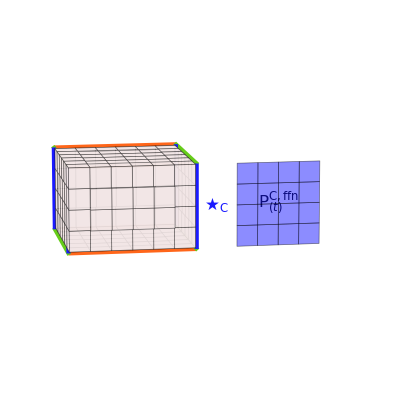

In [99]:
(O,D,C)=xxx.shape
O_color=(1.0,0.4,0.1)
D_color=(0.4,0.8,0.1)
C_color=(0.1,0.1,1.0)

fig=plt.figure(figsize=(4,4),dpi=100)
fig.subplots_adjust(left=0.1,bottom=0.1,right=0.95,top=0.95)
ax=fig.add_axes((0.01,0.01,0.98,0.98),projection='3d')

offset=0.05
ax.plot3D((0+offset,O-offset),(-offset,-offset),(-offset,-offset),linewidth=3,color=O_color,label='dim-O')
ax.plot3D((0+offset,O-offset),(D+offset,D+offset),(-offset,-offset),linewidth=3,color=O_color)
ax.plot3D((0+offset,O-offset),(-offset,-offset),(C+offset,C+offset),linewidth=3,color=O_color)
ax.plot3D((0+offset,O-offset),(D+offset,D+offset),(C+offset,C+offset),linewidth=3,color=O_color)
ax.plot3D((-offset,-offset),(0+offset,D-offset),(-offset,-offset),linewidth=3,color=D_color,label='dim-D')
ax.plot3D((O+offset,O+offset),(0+offset,D-offset),(-offset,-offset),linewidth=3,color=D_color)
ax.plot3D((-offset,-offset),(0+offset,D-offset),(C+offset,C+offset),linewidth=3,color=D_color)
ax.plot3D((O+offset,O+offset),(0+offset,D-offset),(C+offset,C+offset),linewidth=3,color=D_color)
ax.plot3D((-offset,-offset),(-offset,-offset),(0+offset,C-offset),linewidth=3,color=C_color,label='dim-C')
ax.plot3D((O+offset,O+offset),(-offset,-offset),(0+offset,C-offset),linewidth=3,color=C_color)
ax.plot3D((-offset,-offset),(D+offset,D+offset),(0+offset,C-offset),linewidth=3,color=C_color)
ax.plot3D((O+offset,O+offset),(D+offset,D+offset),(0+offset,C-offset),linewidth=3,color=C_color)

max_=max(O,D,C)
# ax.legend(facecolor=None,edgecolor=None,framealpha=0)
ax.set_box_aspect((max_+O+4,max_+D+4,max_+C+4))
ax.set_xlim(-max_-3,O+1)
ax.set_ylim(-max_-3,D+1)
ax.set_zlim(-max_-3,C+1)
ax.set_xticks(range(-max_-3,O+2))
ax.set_yticks(range(-max_-3,D+2))
ax.set_zticks(range(-max_-3,C+2))

facecolor=(0.95,0.9,0.9,0.9)
edgecolor=(0,0,0,0.5)
linewidth=0.5
ax.voxels(xxx,facecolor=facecolor,edgecolor=edgecolor,linewidth=linewidth)

gap=2

# (matrix_O_1,matrix_O_2)=np.meshgrid(np.arange(1+O),np.arange(-gap,-gap-O-1,-1))
# ax.plot_surface(X=matrix_O_1,Y=matrix_O_2,Z=0*(matrix_O_1+matrix_O_2),facecolor=(*O_color,0.5),edgecolor=edgecolor,linewidth=linewidth)
# (matrix_D_1,matrix_D_2)=np.meshgrid(np.arange(-gap,-gap-D-1,-1),np.arange(1+D))
# ax.plot_surface(X=matrix_D_1,Y=matrix_D_2,Z=0*(matrix_D_1+matrix_D_2),facecolor=(*D_color,0.5),edgecolor=edgecolor,linewidth=linewidth)
# ax.text(O/2,-gap/2,0,'$\mathrm{★_O}$',color=O_color,size=16,ha='center',va='center')
# ax.text(O/2,-O/2-gap,0,'$\mathrm{P^{O}_{(\mathit{t})}}$',color='k',size=16,ha='center',va='center')
# ax.text(-gap/2,D/2,0,'$\mathrm{★_D}$',color=D_color,size=16,ha='center',va='center')
# ax.text(-D/2-gap,D/2,0,'$\mathrm{P^{D}_{(\mathit{t})}}$',color='k',size=16,ha='center',va='center')
# ax.view_init(elev=-100,azim=135)
# ax.set_zlim(-1,C+1)
# ax.set_box_aspect((max_+O+4,max_+D+4,C+2))

# (matrix_O_1,matrix_O_2)=np.meshgrid(np.arange(1+O),np.arange(-gap,-gap-O-1,-1))
# ax.plot_surface(X=matrix_O_1,Z=matrix_O_2,Y=0*(matrix_O_1+matrix_O_2),facecolor=(*O_color,0.5),edgecolor=edgecolor,linewidth=linewidth)
# (matrix_C_1,matrix_C_2)=np.meshgrid(np.arange(-gap,-gap-C-1,-1),np.arange(1+C))
# ax.plot_surface(X=matrix_C_1,Z=matrix_C_2,Y=0*(matrix_C_1+matrix_C_2),facecolor=(*C_color,0.5),edgecolor=edgecolor,linewidth=linewidth)
# ax.text(O/2,0,-gap/2,'$\mathrm{★_O}$',color=O_color,size=12,ha='center',va='center')
# ax.text(O/2,0,-O/2-gap,'$\mathrm{P^{O,upd}_{(\mathit{t})}}$',color='k',size=12,ha='center',va='center')
# ax.text(-gap/2,0,C/2,'$\mathrm{★_C}$',color=C_color,size=12,ha='center',va='center')
# ax.text(-C/2-gap,0,C/2,'$\mathrm{P^{CO,upd}_{(\mathit{t})}}$',color='k',size=12,ha='center',va='center')
# ax.view_init(elev=10,azim=80)
# ax.set_ylim(-1,D+1)
# ax.set_box_aspect((max_+O+4,D+2,max_+C+4))

# (matrix_D_1,matrix_D_2)=np.meshgrid(np.arange(1+D),np.arange(-gap,-gap-D-1,-1))
# ax.plot_surface(Y=matrix_D_1,Z=matrix_D_2,X=0*(matrix_D_1+matrix_D_2),facecolor=(*D_color,0.5),edgecolor=edgecolor,linewidth=linewidth)
# (matrix_C_1,matrix_C_2)=np.meshgrid(np.arange(-gap,-gap-C-1,-1),np.arange(1+C))
# ax.plot_surface(Y=matrix_C_1,Z=matrix_C_2,X=0*(matrix_C_1+matrix_C_2),facecolor=(*C_color,0.5),edgecolor=edgecolor,linewidth=linewidth)
# ax.text(0,O/2,-gap/2,'$\mathrm{★_D}$',color=D_color,size=12,ha='center',va='center')
# ax.text(0,O/2,-O/2-gap,'$\mathrm{P^{D,upd}_{(\mathit{t})}}$',color='k',size=12,ha='center',va='center')
# ax.text(0,-gap/2,C/2,'$\mathrm{★_C}$',color=C_color,size=12,ha='center',va='center')
# ax.text(0,-C/2-gap,C/2,'$\mathrm{P^{CD,upd}_{(\mathit{t})}}$',color='k',size=12,ha='center',va='center')
# ax.view_init(elev=10,azim=190)
# ax.set_xlim(-1,O+1)
# ax.set_box_aspect((O+2,max_+D+4,max_+C+4))


(matrix_C_1,matrix_C_2)=np.meshgrid(np.arange(-gap,-gap-C-1,-1),np.arange(1+C))
ax.plot_surface(X=matrix_C_1,Z=matrix_C_2,Y=0*(matrix_C_1+matrix_C_2),facecolor=(*C_color,0.5),edgecolor=edgecolor,linewidth=linewidth)
ax.text(-gap/2,0,C/2,'$\mathrm{★_C}$',color=C_color,size=12,ha='center',va='center')
ax.text(-C/2-gap,0,C/2,'$\mathrm{P^{C,ffn}_{(\mathit{t})}}$',color='k',size=12,ha='center',va='center')
ax.view_init(elev=10,azim=80)
ax.set_ylim(-1,D+1)
ax.set_zlim(-1,C+1)
ax.set_box_aspect((max_+O+4,D+2,C+2))


ax.invert_yaxis()
ax.axis('off')